# Contrastive CNN Variational Quantum Circuit

Quantum autoencoder on larger MNIST images by encoding the high dimensional data using DRC. Based on Quantum Autoencoder project.

In [17]:
import pennylane as qml
from models.quantum import qae_constrastive

import warnings
warnings.filterwarnings('ignore')

### Hyperparameters

- INPUT_DATA_SIZE: The size the images will be scaled to (e.g. 12x12)  
- DRCs: The number of data reuploads in the encoder
- EPOCHS: Number of epochs to train
- LATENT_QBITS: Number qubits in the latent space
- DATA_QBITS: Number of qubits for the encoder
- KERNEL_SIZE
- STRIDE

Since the input images are 12x12, we split each image into 9 4x4 patches. We use 9 data qubits with kernel_size 4 and stride 4.

In [2]:
INPUT_DATA_SIZE = 12

DRCs = 1
EPOCHS = 4

DATA_QBITS = 9
LATENT_QBITS = 5
AUX_QBITS = 3

TOTAL_QBITS = DATA_QBITS * 2 + AUX_QBITS

KERNEL_SIZE = 4
STRIDE = 4

## Contrastive CNN QVC

Create pennylane device to simulate on.

In [12]:
dev1 = qml.device('lightning.qubit', wires=TOTAL_QBITS)

Create CNN contrastive QVC.

In [13]:

model = qae_constrastive.ContrastiveConvEncoderCircuit(DATA_QBITS,
                      LATENT_QBITS,
                      AUX_QBITS,
                      dev1, 
                      INPUT_DATA_SIZE, 
                      kernel_size=4, 
                      stride=4, 
                      DRCs=DRCs)


Plot the circuit:

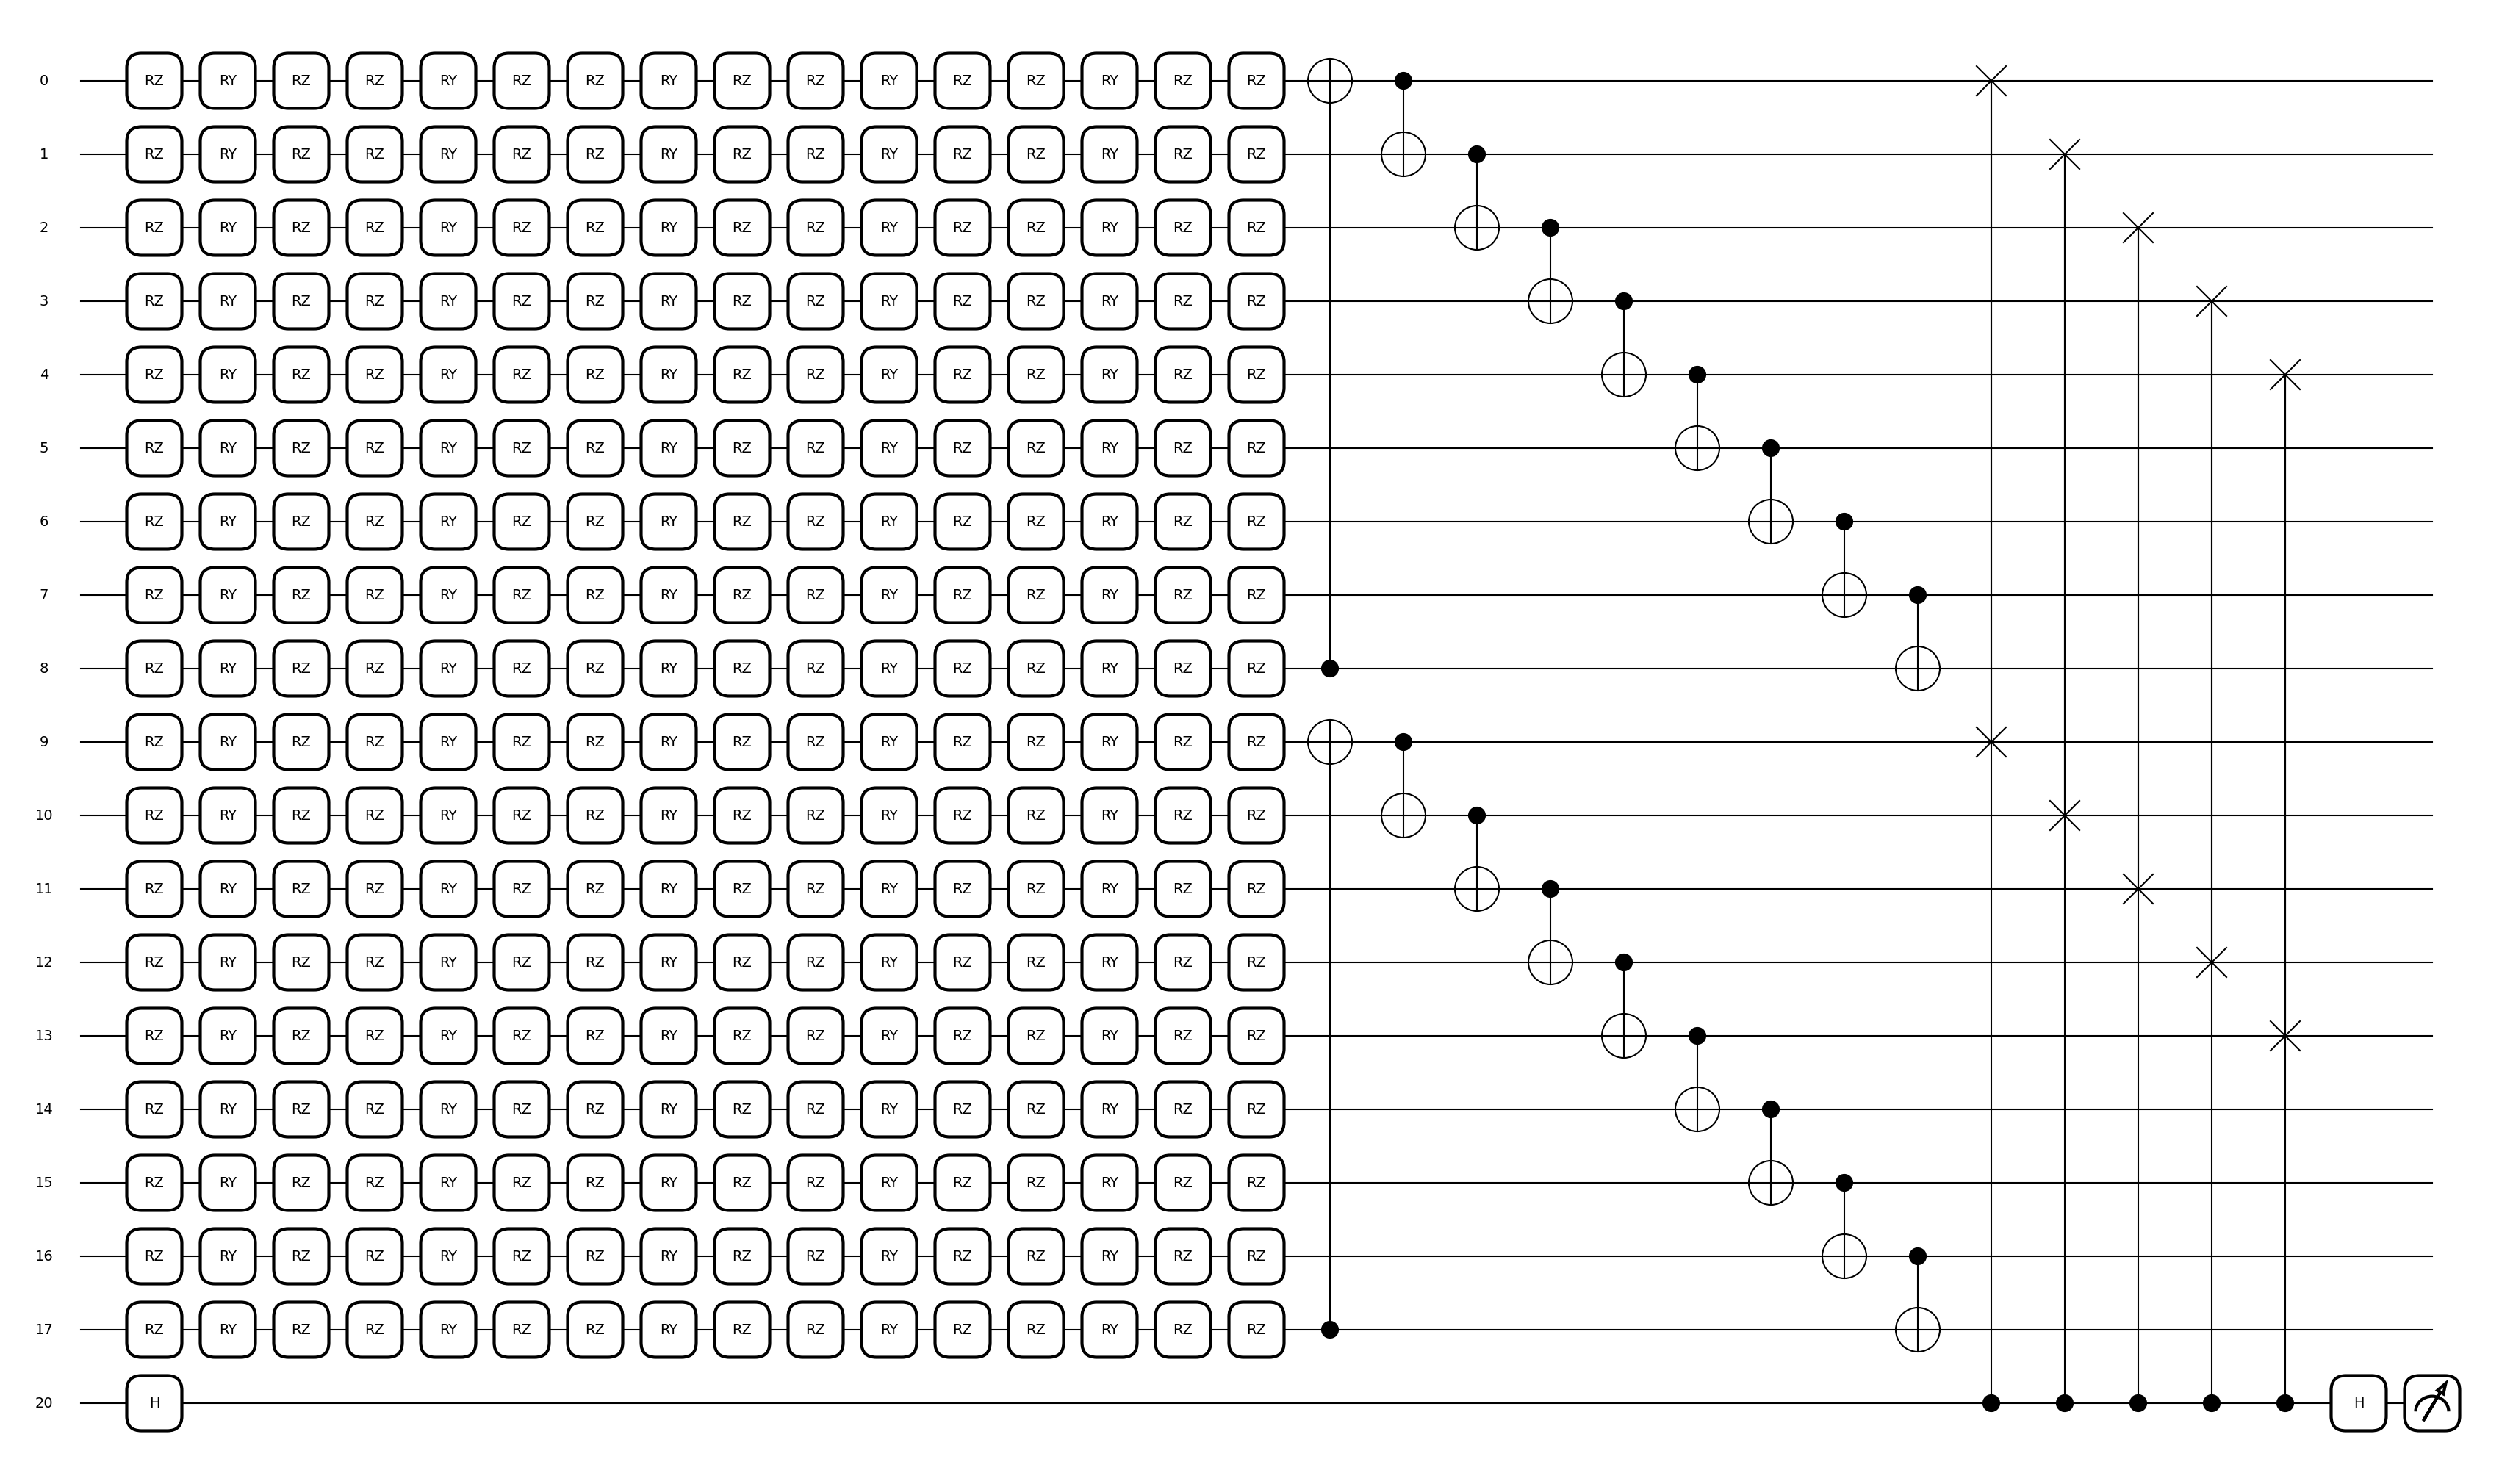

In [14]:
model.plot_circuit()

Draw the circuit:

In [15]:
model.draw_circuit()

expval(Z(20))
 0: ──RZ(0.39)──RY(0.47)──RZ(1.18)──RZ(0.46)──RY(0.53)──RZ(0.10)──RZ(0.75)──RY(1.26)──RZ(1.31)
 1: ──RZ(0.49)──RY(0.99)──RZ(1.00)──RZ(0.57)──RY(0.32)──RZ(0.26)──RZ(1.42)──RY(0.53)──RZ(0.54)
 2: ──RZ(0.46)──RY(0.60)──RZ(1.22)──RZ(0.54)──RY(0.34)──RZ(0.97)──RZ(0.77)──RY(0.47)──RZ(0.30)
 3: ──RZ(0.94)──RY(0.19)──RZ(0.75)──RZ(0.66)──RY(0.45)──RZ(1.47)──RZ(0.95)──RY(0.70)──RZ(0.22)
 4: ──RZ(0.39)──RY(0.75)──RZ(1.23)──RZ(1.39)──RY(0.79)──RZ(0.96)──RZ(0.30)──RY(0.83)──RZ(0.28)
 5: ──RZ(0.89)──RY(0.34)──RZ(1.18)──RZ(0.71)──RY(0.36)──RZ(0.28)──RZ(0.28)──RY(0.25)──RZ(0.79)
 6: ──RZ(0.30)──RY(0.29)──RZ(0.28)──RZ(1.03)──RY(1.21)──RZ(0.86)──RZ(0.04)──RY(0.67)──RZ(0.24)
 7: ──RZ(1.46)──RY(0.90)──RZ(1.14)──RZ(0.58)──RY(0.84)──RZ(0.80)──RZ(1.52)──RY(0.76)──RZ(0.94)
 8: ──RZ(0.49)──RY(0.33)──RZ(0.96)──RZ(1.26)──RY(0.82)──RZ(1.63)──RZ(0.41)──RY(0.70)──RZ(0.97)
 9: ──RZ(0.39)──RY(0.47)──RZ(1.18)──RZ(0.46)──RY(0.53)──RZ(0.10)──RZ(0.75)──RY(1.26)──RZ(1.31)
10: ──RZ(0.49)──RY(0.99)──RZ(1.00)──

We confirm that the parameter of the two circuits are the same with similar parameter.

In [16]:

# from torch.utils.data import DataLoader, TensorDataset, random_split

# train_loader = DataLoader(x_train_3_small, batch_size=8, shuffle=True)
# val_loader = DataLoader(x_test_3_small, batch_size=8)

# import pytorch_lightning as pl
# from pytorch_lightning.loggers import CSVLogger

# dev = qml.device('default.qubit', wires=8)
# # model = ConvSQAE(data_qbits=8, latent_qbits=4, device=dev, img_dim=8, kernel_size=3, stride=1, DRCs=1, learning_rate=0.01)

# logger = CSVLogger(save_dir="logs/", name="quantum_autoencoder")
# trainer = pl.Trainer(max_epochs=3, logger=logger, gpus=0)
# trainer.fit(model, train_loader, val_loader)